2

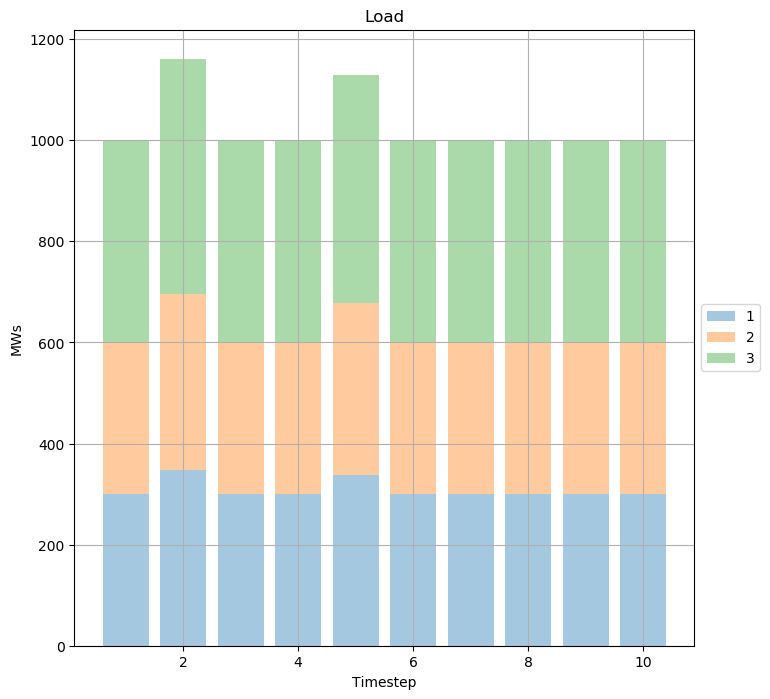

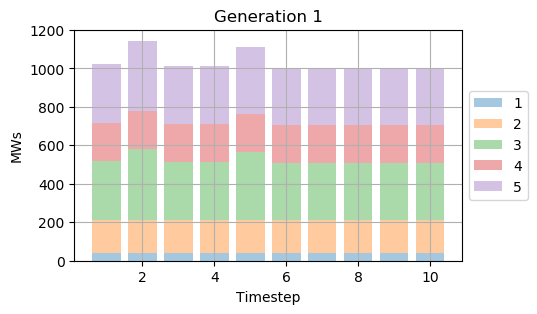

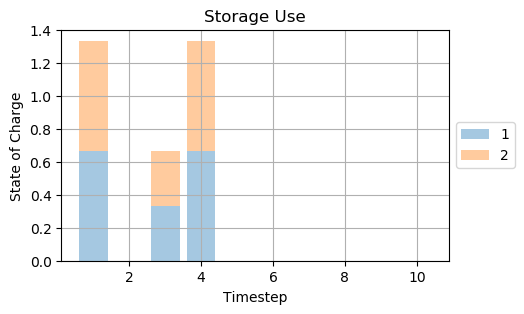

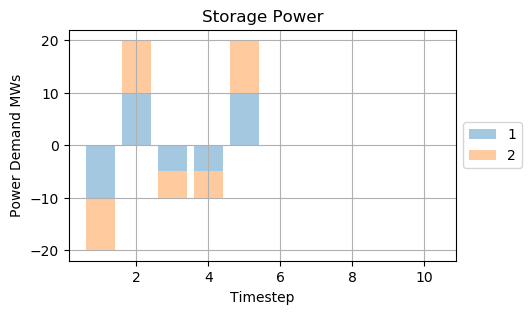


2


In [7]:
using PyCall, PyPlot
function plotGeneration(ref)
    ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia
    timesteps = length(collect(keys(ref[:nw])))
    generators = length(collect(keys(ref[:nw][1][:gen])))
    x = zeros(generators, timesteps)
    y = zeros(generators, timesteps)
    
    for i=1:generators
        for t in sort(collect(keys(ref[:nw])))
            x[i,t] = t
            y[i,t] = getvalue(pg[t,i])*mp_data["baseMVA"]
        end
    end

    ################
    ##  Bar Plot  ##
    ################
    fig = figure("Generation)",figsize=(5,3))
    b = bar(x[1,:],y[1,:], align="center",alpha=0.4)
    for i = 2:generators
        b = bar(x[i,:],y[i,:], bottom=sum(y[k,:] for k=1:i-1), align="center",alpha=0.4)
    end
    axis("tight")
    title("Generation $(1)")
    grid("on")
    xlabel("Timestep")
    ylabel("MWs")
    legend(1:generators, loc="center left", bbox_to_anchor=(1, 0.5))

    gcf() # Needed for IJulia to plot inline
end

function plotSoC(ref)
    ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia
    timesteps = length(collect(keys(ref[:nw])))
    storage = length(collect(keys(ref[:nw][1][:storage])))
    x = zeros(storage, timesteps)
    y = zeros(storage, timesteps)
    
    for i=1:storage
        for t in sort(collect(keys(ref[:nw])))
            x[i,t] = t
            y[i,t] = getvalue(es[t,i])/ref[:nw][t][:storage][i]["energy_rating"]
        end
    end

    ################
    ##  Bar Plot  ##
    ################
    fig = figure("SoC",figsize=(5,3))
    b = bar(x[1,:],y[1,:], align="center",alpha=0.4)
    for i = 2:storage
        b = bar(x[i,:],y[i,:], bottom=sum(y[k,:] for k=1:i-1), align="center",alpha=0.4)
    end
    axis("tight")
    title("Storage Use")
    grid("on")
    xlabel("Timestep")
    ylabel("State of Charge")
    legend(1:storage, loc="center left", bbox_to_anchor=(1, 0.5))

    gcf() # Needed for IJulia to plot inline
    println(storage)
end

function plotStoragePower(ref)
    ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia
    timesteps = length(collect(keys(ref[:nw])))
    storage = length(collect(keys(ref[:nw][1][:storage])))
    x = zeros(storage, timesteps)
    y = zeros(storage, timesteps)
    
    for i=1:storage
        for t in sort(collect(keys(ref[:nw])))
            x[i,t] = t
            y[i,t] = getvalue(ps[t,i])*mp_data["baseMVA"]
        end
    end

    ################
    ##  Bar Plot  ##
    ################
    fig = figure("Storage Power",figsize=(5,3))
    b = bar(x[1,:],y[1,:], align="center",alpha=0.4)
    for i = 2:storage
        b = bar(x[i,:],y[i,:], bottom=sum(y[k,:] for k=1:i-1), align="center",alpha=0.4)
    end
    axis("tight")
    title("Storage Power")
    grid("on")
    xlabel("Timestep")
    ylabel("Power Demand MWs")
    legend(1:storage, loc="center left", bbox_to_anchor=(1, 0.5))

    gcf() # Needed for IJulia to plot inline
    println(storage)
end

function plotDemand(ref)
    ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia
    timesteps = length(collect(keys(ref[:nw])))
    loads = length(collect(keys(ref[:nw][1][:load])))
    x = zeros(loads, timesteps)
    y = zeros(loads, timesteps)

    for i=1:loads
        for t in sort(collect(keys(ref[:nw])))
            x[i,t] = t
            y[i,t] = ref[:nw][t][:load][i]["pd"]*mp_data["baseMVA"]
        end
    end

    ################
    ##  Bar Plot  ##
    ################
    fig = figure("Load)",figsize=(8,8))
    b = bar(x[1,:],y[1,:], align="center",alpha=0.4)
    for i = 2:loads
        b = bar(x[i,:],y[i,:], bottom=sum(y[k,:] for k=1:i-1), align="center",alpha=0.4)
    end
    axis("tight")
    title("Load")
    grid("true")
    xlabel("Timestep")
    ylabel("MWs")
    legend(1:loads, loc="center left", bbox_to_anchor=(1, 0.5))
    gcf() # Needed for IJulia to plot inline
    savefig("Loads.svg")
end
plotDemand(ref)
plotGeneration(ref);
plotSoC(ref);
plotStoragePower(ref)

In [9]:
ref[:nw][1][:storage][1]


Dict{String,Any} with 15 entries:
  "energy_rating"        => 0.01
  "standby_loss"         => 0.0
  "x"                    => 0.0
  "energy"               => 0.0
  "r"                    => 0.1
  "thermal_rating"       => 1.0
  "status"               => 1
  "discharge_rating"     => 0.1
  "storage_bus"          => 2
  "charge_efficiency"    => 0.8
  "index"                => 1
  "qmax"                 => 0.7
  "qmin"                 => -0.5
  "charge_rating"        => 0.1
  "discharge_efficiency" => 0.9

case_ieee123_storage_1.m
case_ieee123_storage_10.m
case_ieee123_storage_100.m
case_ieee123_storage_101.m
case_ieee123_storage_102.m
case_ieee123_storage_103.m
case_ieee123_storage_104.m
case_ieee123_storage_105.m
case_ieee123_storage_106.m
case_ieee123_storage_107.m
case_ieee123_storage_108.m
case_ieee123_storage_109.m
case_ieee123_storage_11.m
case_ieee123_storage_110.m
case_ieee123_storage_111.m
case_ieee123_storage_112.m
case_ieee123_storage_113.m
case_ieee123_storage_114.m
case_ieee123_storage_115.m
case_ieee123_storage_116.m
case_ieee123_storage_117.m
case_ieee123_storage_118.m
case_ieee123_storage_119.m
case_ieee123_storage_12.m
case_ieee123_storage_120.m
case_ieee123_storage_121.m
case_ieee123_storage_122.m
case_ieee123_storage_123.m
case_ieee123_storage_124.m
case_ieee123_storage_125.m
case_ieee123_storage_126.m
case_ieee123_storage_127.m
case_ieee123_storage_128.m
case_ieee123_storage_129.m
case_ieee123_storage_13.m
case_ieee123_storage_130.m
case_ieee123_storage_131.m
case_ie

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 29 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 1 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 1 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 54 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 54 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 2 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 2 from 360.0 to 60.0 deg.
[war

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 37 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 47 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 47 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 9 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 9 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 12 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 12 from 360.0 to 60.0 deg.
[w

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 32 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 29 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 29 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 1 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 1 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 54 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 54 from 360.0 to 60.0 deg.
[w

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 17 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 37 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 37 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 47 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 47 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 9 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 9 from 360.0 to 60.0 deg.
[w

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 3 from 360.0 to 60.0 deg.
[info | PowerModels]: extending matpower format with constant data: time_elapsed
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 32 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 32 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 29 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 29 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 1 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in 

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 55 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 17 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 17 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 37 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 37 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 47 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 47 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 30 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 3 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 3 from 360.0 to 60.0 deg.
[info | PowerModels]: extending matpower format with constant data: time_elapsed
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 32 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 32 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 29 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in 

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 44 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 55 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 55 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 17 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 17 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 37 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 37 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 18 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 30 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 30 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 3 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 3 from 360.0 to 60.0 deg.
[info | PowerModels]: extending matpower format with constant data: time_elapsed
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 32 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in 

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 34 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 44 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 44 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 55 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 55 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 17 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 17 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 48 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 18 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 18 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 30 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 30 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 3 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 3 from 360.0 to 60.0 deg.
[i

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 39 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 34 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 34 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 44 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 44 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 55 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 55 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 36 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 48 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 48 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 18 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 18 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 30 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 30 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 43 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 39 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 39 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 34 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 34 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 44 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 44 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 45 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 36 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 36 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 48 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 48 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 18 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 18 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 31 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 43 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 43 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 39 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 39 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 34 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 34 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 46 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 45 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 45 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 36 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 36 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 48 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 48 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 5 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 5 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 31 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 31 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 43 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 43 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 39 from -360.0 to -60.0 deg.


[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 38 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 38 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 46 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 46 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 45 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 45 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 36 from -360.0 to -60.0 deg

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 23 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 49 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 49 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 5 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 5 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 31 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 31 from 360.0 to 60.0 deg.
[w

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 40 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 21 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 21 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 38 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 38 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 46 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 46 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 25 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 25 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 23 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 23 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 49 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 49 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 5 from -360.0 to -60.0 deg.

[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 16 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 16 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 40 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 40 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 21 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 21 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 38 from -360.0 to -60.0 deg

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 10 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 24 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 24 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 25 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 25 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 23 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 23 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 15 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 15 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 16 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 16 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 40 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 40 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 21 from -360.0 to -60.0 deg

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 26 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 10 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 10 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 24 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 24 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 25 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 25 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 35 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 13 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 13 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 15 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 15 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 16 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 16 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 52 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 52 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 26 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 26 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 10 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 10 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 24 from -360.0 to -60.0 deg

[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 11 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 11 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 35 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 35 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 13 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 13 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 15 from -360.0 to -60.0 deg

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 28 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 50 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 50 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 52 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 52 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 26 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 26 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 4 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 22 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 22 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 11 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 11 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 35 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 35 from 360.0 to 60.0 deg.
[

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 33 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 28 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 28 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 50 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 50 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 52 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 52 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 19 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 4 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 4 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 22 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 22 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 11 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 11 from 360.0 to 60.0 deg.
[w

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 42 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 33 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 33 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 28 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 28 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 50 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 50 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 8 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 19 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 19 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 4 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 4 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 22 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 22 from 360.0 to 60.0 deg.
[wa

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 27 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 42 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 42 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 33 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 33 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 28 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 28 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 7 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 8 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 8 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 19 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 19 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 4 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 4 from 360.0 to 60.0 deg.
[warn

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 53 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 27 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 27 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 42 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 42 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 33 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 33 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 14 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 7 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 7 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 8 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 8 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 19 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 19 from 360.0 to 60.0 deg.
[war

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 51 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 53 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 53 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 27 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 27 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 42 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 42 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 6 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 14 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 14 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 7 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 7 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 8 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 8 from 360.0 to 60.0 deg.
[warn

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 41 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 51 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 51 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 53 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 53 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 27 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 27 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 20 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 6 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 6 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 14 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 14 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 7 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 7 from 360.0 to 60.0 deg.
[war

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 2 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 41 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 41 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 51 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 51 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 53 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 53 from 360.0 to 60.0 deg.
[

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 12 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 20 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 20 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 6 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 6 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 14 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 14 from 360.0 to 60.0 deg.
[w

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 54 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 2 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 2 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 41 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 41 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 51 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 51 from 360.0 to 60.0 deg.
[w

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 9 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 12 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 12 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 20 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 20 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 6 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 6 from 360.0 to 60.0 deg.
[wa

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 1 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 54 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 54 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 2 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 2 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 41 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 41 from 360.0 to 60.0 deg.
[wa

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 47 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 9 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 9 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 12 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 12 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 20 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 20 from 360.0 to 60.0 deg.
[w

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 29 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 1 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 1 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 54 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 54 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 2 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 2 from 360.0 to 60.0 deg.
[war

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 37 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 47 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 47 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 9 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 9 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 12 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 12 from 360.0 to 60.0 deg.
[w

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 32 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 29 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 29 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 1 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 1 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 54 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 54 from 360.0 to 60.0 deg.
[w

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 17 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 37 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 37 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 47 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 47 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 9 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 9 from 360.0 to 60.0 deg.
[w

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 3 from 360.0 to 60.0 deg.
[info | PowerModels]: extending matpower format with constant data: time_elapsed
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 32 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 32 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 29 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 29 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 1 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in 

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 55 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 17 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 17 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 37 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 37 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 47 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 47 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 30 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 3 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 3 from 360.0 to 60.0 deg.
[info | PowerModels]: extending matpower format with constant data: time_elapsed
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 32 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 32 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 29 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in 

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 44 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 55 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 55 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 17 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 17 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 37 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 37 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 18 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 30 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 30 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 3 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 3 from 360.0 to 60.0 deg.
[info | PowerModels]: extending matpower format with constant data: time_elapsed
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 32 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in 

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 34 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 44 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 44 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 55 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 55 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 17 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 17 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 48 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 18 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 18 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 30 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 30 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 3 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 3 from 360.0 to 60.0 deg.
[i

[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 39 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 34 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 34 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 44 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 44 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 55 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 55 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 36 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 48 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 48 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 18 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 18 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 30 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 30 from 360.0 to 60.0 deg.


[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 43 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 39 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 39 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 34 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 34 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 44 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 44 from 360.0 to 60.0 deg.


Excessive output truncated after 524327 bytes.

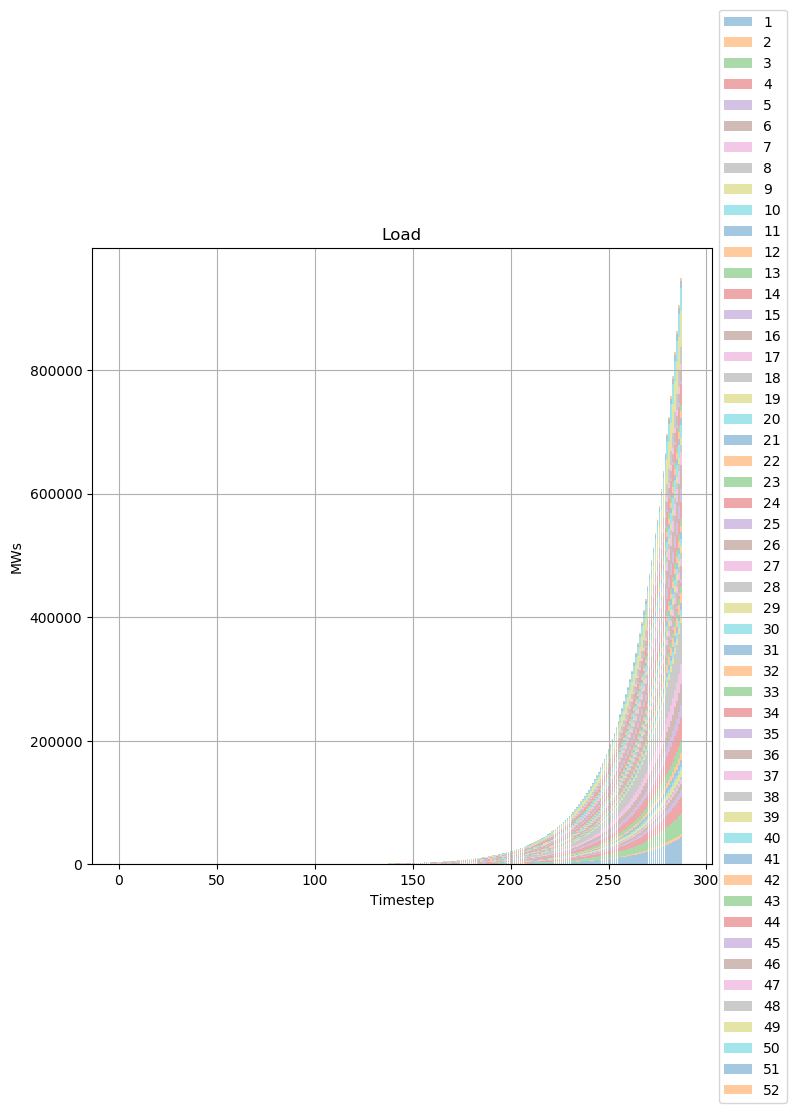

In [10]:
#--------------------
using PowerModels
using Ipopt
using JuMP

path = "./ModelData/"
key = "case_ieee123_storage_"
file_ext = ".m"


# Instancate a Solver
#--------------------

nlp_solver = IpoptSolver(print_level=0)
# note: print_level changes the amount of solver information printed to the terminal


# Load System Data
# ----------------


periods = 0
for (root, dirs, files) in walkdir(path)
    for file in files
        if occursin(key, file)
            println(file)
            global periods=periods+1
        end
    end
end

#mp_data=[]

for i=1:periods
    if i == 1
        data_1 = PowerModels.parse_file(string(path,key,i,file_ext))

        global mp_data = Dict{String,Any}(
            "name" => "$(data_1["name"])",
            "multinetwork" => true,
            "per_unit" => data_1["per_unit"],
            "baseMVA" => data_1["baseMVA"],
            "nw" => Dict{String,Any}()
        )

        delete!(data_1, "multinetwork")
        delete!(data_1, "per_unit")
        delete!(data_1, "baseMVA")
        global mp_data["nw"]["$(i)"] = data_1

    else
        data_2 = PowerModels.parse_file(string(path,key,i,file_ext))
        delete!(data_2, "multinetwork")
        delete!(data_2, "per_unit")
        delete!(data_2, "baseMVA")
        global mp_data["nw"]["$(i)"] = data_2
    end
end

# Add zeros to turn linear objective functions into quadratic ones
# so that additional parameter checks are not required
PowerModels.standardize_cost_terms(mp_data, order=2)

# use build_ref to filter out inactive components
#ref = PowerModels.build_ref(data)[:nw][0]
ref = PowerModels.build_ref(mp_data)
# note: ref contains all the relevant system parameters needed to build the OPF model
# When we introduce constraints and variable bounds below, we use the parameters in ref.

plotDemand(ref)

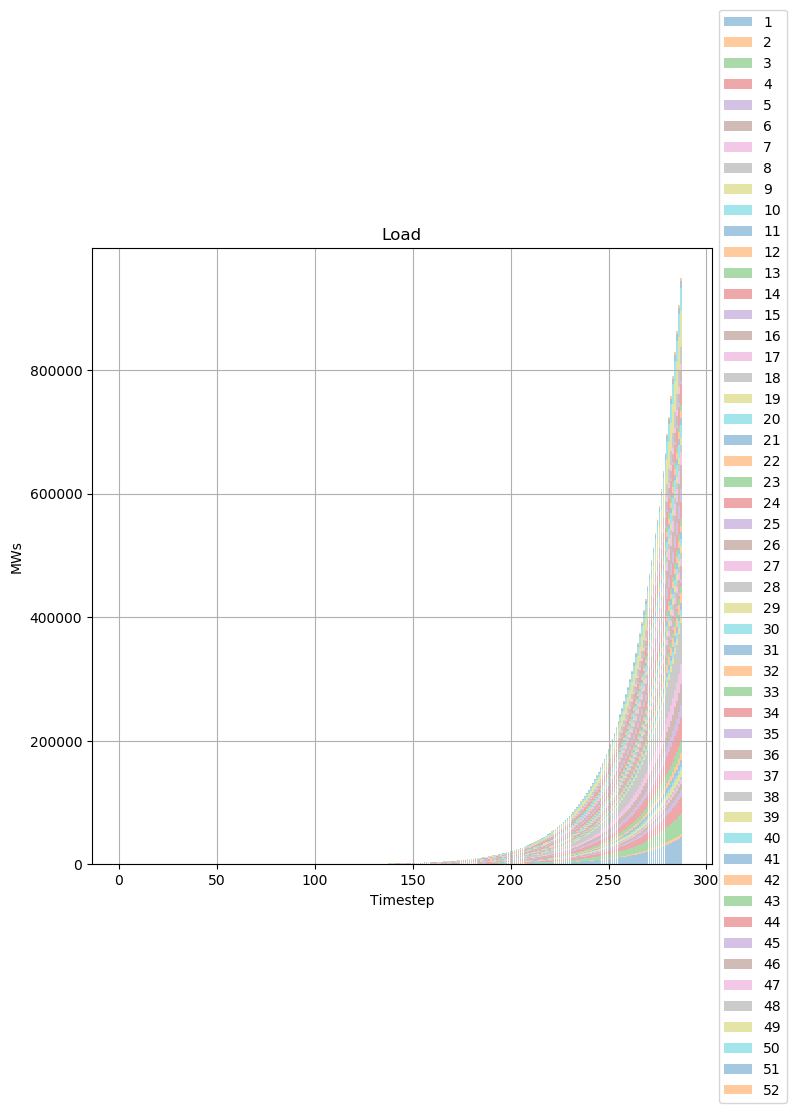

In [11]:

plotDemand(ref)

In [1]:
#--------------------
using PowerModels
using Ipopt
using JuMP

path = "./ModelData/"
key = "case5_"
file_ext = ".m"


# Instancate a Solver
#--------------------

nlp_solver = IpoptSolver(print_level=0)
# note: print_level changes the amount of solver information printed to the terminal


# Load System Data
# ----------------


periods = 0
for (root, dirs, files) in walkdir(path)
    for file in files
        if occursin(key, file)
            println(file)
            global periods=periods+1
        end
    end
end

#mp_data=[]

for i=1:periods
    if i == 1
        data_1 = PowerModels.parse_file(string(path,key,i,file_ext))

        global mp_data = Dict{String,Any}(
            "name" => "$(data_1["name"])",
            "multinetwork" => true,
            "per_unit" => data_1["per_unit"],
            "baseMVA" => data_1["baseMVA"],
            "nw" => Dict{String,Any}()
        )

        delete!(data_1, "multinetwork")
        delete!(data_1, "per_unit")
        delete!(data_1, "baseMVA")
        global mp_data["nw"]["$(i)"] = data_1

    else
        data_2 = PowerModels.parse_file(string(path,key,i,file_ext))
        delete!(data_2, "multinetwork")
        delete!(data_2, "per_unit")
        delete!(data_2, "baseMVA")
        global mp_data["nw"]["$(i)"] = data_2
    end
end

# Add zeros to turn linear objective functions into quadratic ones
# so that additional parameter checks are not required
PowerModels.standardize_cost_terms(mp_data, order=2)

# use build_ref to filter out inactive components
#ref = PowerModels.build_ref(data)[:nw][0]
ref = PowerModels.build_ref(mp_data)
# note: ref contains all the relevant system parameters needed to build the OPF model
# When we introduce constraints and variable bounds below, we use the parameters in ref.


###############################################################################
# 1. Building the Optimal Power Flow Model
###############################################################################

# Initialize a JuMP Optimization Model
#-------------------------------------
model = Model(solver = nlp_solver)


# Add Optimization and State Variables
# ------------------------------------

# Add voltage angles va for each bus
@variable(model, va[t in keys(ref[:nw]), i in keys(ref[:nw][t][:bus])])

# Add voltage angles vm for each bus
@variable(model, ref[:nw][t][:bus][i]["vmin"] <= vm[t in keys(ref[:nw]), i in keys(ref[:nw][t][:bus])] <= ref[:nw][t][:bus][i]["vmax"], start=1.0)

# Add active power generation variables pg for each generator, including bounds
@variable(model, ref[:nw][t][:gen][i]["pmin"] <= pg[t in keys(ref[:nw]), i in keys(ref[:nw][t][:gen])] <= ref[:nw][t][:gen][i]["pmax"])
# Add reactive power generation variable qg for each generator (including limits)
@variable(model, ref[:nw][t][:gen][i]["qmin"] <= qg[t in keys(ref[:nw]), i in keys(ref[:nw][t][:gen])] <= ref[:nw][t][:gen][i]["qmax"])

# Add power flow variables p to represent the active power flow for each branch
@variable(model, -ref[:nw][t][:branch][l]["rate_a"] <= p[t in keys(ref[:nw]), (l,i,j) in ref[:nw][t][:arcs]] <= ref[:nw][t][:branch][l]["rate_a"])
# Add power flow variables q to represent the reactive power flow for each branch
@variable(model, -ref[:nw][t][:branch][l]["rate_a"] <= q[t in keys(ref[:nw]), (l,i,j) in ref[:nw][t][:arcs]] <= ref[:nw][t][:branch][l]["rate_a"])

# Add storage power variables
@variable(model, -ref[:nw][t][:storage][i]["discharge_rating"] <= ps[t in keys(ref[:nw]), i in keys(ref[:nw][t][:storage])] <= ref[:nw][t][:storage][i]["discharge_rating"] )
@variable(model, ref[:nw][t][:storage][i]["qmin"] <= qs[t in keys(ref[:nw]), i in keys(ref[:nw][t][:storage])] <= ref[:nw][t][:storage][i]["qmax"])
@variable(model, 0 <= es[t in keys(ref[:nw]), i in keys(ref[:nw][t][:storage])] <= ref[:nw][t][:storage][i]["energy_rating"] )


# Add Objective Function
# ----------------------

# Minimize cost power generation
# assumes costs are given as quadratic functions
@objective(model, Min,
    sum(gen["cost"][1]*pg[t,i]^2 + gen["cost"][2]*pg[t,i] + gen["cost"][3] for t in keys(ref[:nw]), (i,gen) in ref[:nw][t][:gen])
)

# Add Constraints
# ---------------

# Fix the voltage angle to zero at the reference bus
for t in keys(ref[:nw]), (i,bus) in ref[:nw][t][:ref_buses]
    @constraint(model, va[t,i] == 0)
end

# Nodal power balance constraints
for t in keys(ref[:nw]), (i,bus) in ref[:nw][t][:bus]
    # Build a list of the loads and shunt elements connected to the bus i
    bus_loads = [ref[:nw][t][:load][l] for l in ref[:nw][t][:bus_loads][i]]
    bus_shunts = [ref[:nw][t][:shunt][s] for s in ref[:nw][t][:bus_shunts][i]]

    # Active power balance at node i
    @constraint(model,
        sum(p[t,a] for a in ref[:nw][t][:bus_arcs][i]) ==      # sum of active power flow on lines from bus i
        sum(ps[t,e] for e in ref[:nw][t][:bus_storage][i]) +   # sum of active energy storage injections from bus i
        sum(pg[t,g] for g in ref[:nw][t][:bus_gens][i]) -      # sum of active power generation at bus i
        sum(load["pd"] for load in bus_loads) -                # sum of active load consumption at bus i
        sum(shunt["gs"] for shunt in bus_shunts)*vm[t,i]^2     # sum of active shunt element injections at bus i
    )

    # Reactive power balance at node i
    @constraint(model,
        sum(q[t,a] for a in ref[:nw][t][:bus_arcs][i]) ==      # sum of active power flow on lines from bus i
        sum(qs[t,e] for e in ref[:nw][t][:bus_storage][i]) +   # sum of reactive energy storage injections from bus i
        sum(qg[t,g] for g in ref[:nw][t][:bus_gens][i]) -      # sum of active power generation at bus i
        sum(load["qd"] for load in bus_loads) -                # sum of active load consumption at bus i
        sum(shunt["bs"] for shunt in bus_shunts)*vm[t,i]^2     # sum of active shunt element injections at bus i
    )
end

# Branch flow limits
for t in keys(ref[:nw]), (i, branch) in ref[:nw][t][:branch]
    # build the from variable id of the i-th branch
    f_idx = (i, branch["f_bus"], branch["t_bus"])
    # build the to variable id of the i-th branch
    t_idx = (i, branch["t_bus"], branch["f_bus"])
     # note: it is necessary to distinguish between the from and to sides of a branch due to power losses

    p_fr = p[t, f_idx]                     # p_fr is a reference to the optimization variable p[f_idx]
    q_fr = q[t, f_idx]                     # q_fr is a reference to the optimization variable q[f_idx]
    p_to = p[t, t_idx]                     # p_to is a reference to the optimization variable p[t_idx]
    q_to = q[t, t_idx]                     # q_to is a reference to the optimization variable q[t_idx]
    # note: adding constraints to p_fr is equivalent to adding constraints to p[f_idx], and so on

    vm_fr = vm[t, branch["f_bus"]]         # vm_fr is a reference to the optimization variable vm on the from side of the branch
    vm_to = vm[t, branch["t_bus"]]         # vm_to is a reference to the optimization variable vm on the to side of the branch
    va_fr = va[t, branch["f_bus"]]         # va_fr is a reference to the optimization variable va on the from side of the branch
    va_to = va[t, branch["t_bus"]]         # va_fr is a reference to the optimization variable va on the to side of the branch

    # Compute the branch parameters and transformer ratios from the data


    g, b = PowerModels.calc_branch_y(branch)
    tr, ti = PowerModels.calc_branch_t(branch)
    g_fr = branch["g_fr"]
    b_fr = branch["b_fr"]
    g_to = branch["g_to"]
    b_to = branch["b_to"]
    tm = branch["tap"]^2
    # note: tap is assumed to be 1.0 on non-transformer branches

    # From side of the branch flow
    @NLconstraint(model, p_fr ==  (g+g_fr)/tm*vm_fr^2 + (-g*tr+b*ti)/tm*(vm_fr*vm_to*cos(va_fr-va_to)) + (-b*tr-g*ti)/tm*(vm_fr*vm_to*sin(va_fr-va_to)) )
    @NLconstraint(model, q_fr == -(b+b_fr)/tm*vm_fr^2 - (-b*tr-g*ti)/tm*(vm_fr*vm_to*cos(va_fr-va_to)) + (-g*tr+b*ti)/tm*(vm_fr*vm_to*sin(va_fr-va_to)) )

    # To side of the branch flow
    @NLconstraint(model, p_to ==  (g+g_to)*vm_to^2 + (-g*tr-b*ti)/tm*(vm_to*vm_fr*cos(va_to-va_fr)) + (-b*tr+g*ti)/tm*(vm_to*vm_fr*sin(va_to-va_fr)) )
    @NLconstraint(model, q_to == -(b+b_to)*vm_to^2 - (-b*tr+g*ti)/tm*(vm_to*vm_fr*cos(va_fr-va_to)) + (-g*tr-b*ti)/tm*(vm_to*vm_fr*sin(va_to-va_fr)) )

    # Voltage angle difference limit
    @constraint(model, va_fr - va_to <= branch["angmax"])
    @constraint(model, va_fr - va_to >= branch["angmin"])

    # Apparent power limit, from side and to side
    @constraint(model, p_fr^2 + q_fr^2 <= branch["rate_a"]^2)
    @constraint(model, p_to^2 + q_to^2 <= branch["rate_a"]^2)

end


# Storage Energy Balance Constraints
for t in keys(ref[:nw]), (i,bus) in ref[:nw][t][:bus]
    if t == 1
        # Initial Energy Constraint
        for e in ref[:nw][t][:bus_storage][i]
            @constraint(model, es[t,e] == ref[:nw][t][:storage][e]["energy"]*(1-ref[:nw][t][:storage][e]["standby_loss"]) - ps[t,e]*ref[:nw][t][:time_elapsed]*ref[:nw][t][:storage][e]["charge_efficiency"])
        end

    else
        # Energy Balance Constraint
        for e in ref[:nw][t][:bus_storage][i]
            @constraint(model, es[t,e] == es[t-1,e]*(1-ref[:nw][t][:storage][e]["standby_loss"]) - ps[t,e]*ref[:nw][t][:time_elapsed]*ref[:nw][t][:storage][e]["charge_efficiency"])
        end
    end
    if t == length(keys(ref[:nw]))
        # Final energy must equal initial energy
        for e in ref[:nw][t][:bus_storage][i]
            @constraint(model, es[t,e] == ref[:nw][t][:storage][e]["energy"])
        end
    end
end



###############################################################################
# 3. Solve the Optimal Power Flow Model and Review the Results
###############################################################################

# Solve the optimization problem
status = solve(model)
println(status)

# Check the value of the objective function
cost = getobjectivevalue(model)
println("The cost of generation is $(cost).")

# Check the value of an optimization variable
# Example: Active power generated at generator 1

println("The active power generated at  each generator is:")
for t in sort(collect(keys(ref[:nw]))), i in sort(collect(keys(ref[:nw][t][:gen])))
     println("In timestep $(t), generator $(i) produces $(getvalue(pg[t,i])*mp_data["baseMVA"]) MW")
end

println("\n The active power generated at each time-step is")
for t in sort(collect(keys(ref[:nw])))
     #println("In timestep $(t), generator $(i) produces $(getvalue(pg[t,i])*ref[:nw][t][:baseMVA]) p.u. (not MW_.")
     println("In timestep $(t), $(sum(getvalue(pg[t,i])*mp_data["baseMVA"] for i in keys(ref[:nw][t][:gen]))) MW is generated")
end
println("\nThe active power at each storage system is:")
for t in sort(collect(keys(ref[:nw]))), i in sort(collect(keys(ref[:nw][t][:storage])))
     #println("In timestep $(t), generator $(i) produces $(getvalue(pg[t,i])*ref[:nw][t][:baseMVA]) p.u. (not MW_.")
     println("In timestep $(t), storage system $(i) stores $(-getvalue(ps[t,i])) p.u.")
end
println("\nThe energy stored at each storage system is:")
for t in sort(collect(keys(ref[:nw]))), i in sort(collect(keys(ref[:nw][t][:storage])))
     #println("In timestep $(t), generator $(i) produces $(getvalue(pg[t,i])*ref[:nw][t][:baseMVA]) p.u. (not MW_.")
     println("In timestep $(t), storage system $(i) stores $(getvalue(es[t,i])*mp_data["baseMVA"]) MWh")
end


# note: the optimization model is in per unit, so the baseMVA value is used to restore the physical units



case5_1.m
case5_10.m
case5_2.m
case5_3.m
case5_4.m
case5_5.m
case5_6.m
case5_7.m
case5_8.m
case5_9.m
[info | PowerModels]: extending matpower format with constant data: time_elapsed
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 4 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 4 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 1 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 1 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 5 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on

[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 2 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 2 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 6 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 6 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 3 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 3 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports positive rate_a values, changing the value on branch 4 to 11148.1255
[warn | PowerModels]: this code o

[warn | PowerModels]: this code only supports positive rate_a values, changing the value on branch 5 to 4053.8638
[warn | PowerModels]: this code only supports positive rate_a values, changing the value on branch 2 to 3960.5183
[warn | PowerModels]: this code only supports positive rate_a values, changing the value on branch 3 to 18812.4618
[info | PowerModels]: extending matpower format with constant data: time_elapsed
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 4 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 4 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 1 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 1 from 360.0 to 60.0 deg.
[warn | 

In timestep 1, generator 4 produces 200.0 MW
In timestep 1, generator 5 produces 304.5079498938375 MW
In timestep 2, generator 1 produces 40.0 MW
In timestep 2, generator 2 produces 170.0 MW
In timestep 2, generator 3 produces 369.27470830262536 MW
In timestep 2, generator 4 produces 200.0 MW
In timestep 2, generator 5 produces 364.6095950590024 MW
In timestep 3, generator 1 produces 40.0 MW
In timestep 3, generator 2 produces 170.0 MW
In timestep 3, generator 3 produces 302.95115954321244 MW
In timestep 3, generator 4 produces 200.0 MW
In timestep 3, generator 5 produces 299.52500185779604 MW
In timestep 4, generator 1 produces 40.0 MW
In timestep 4, generator 2 produces 170.0 MW
In timestep 4, generator 3 produces 302.95115954245716 MW
In timestep 4, generator 4 produces 200.0 MW
In timestep 4, generator 5 produces 299.52500185703803 MW
In timestep 5, generator 1 produces 40.0 MW
In timestep 5, generator 2 produces 170.0 MW
In timestep 5, generator 3 produces 352.96502754799894 MW
In

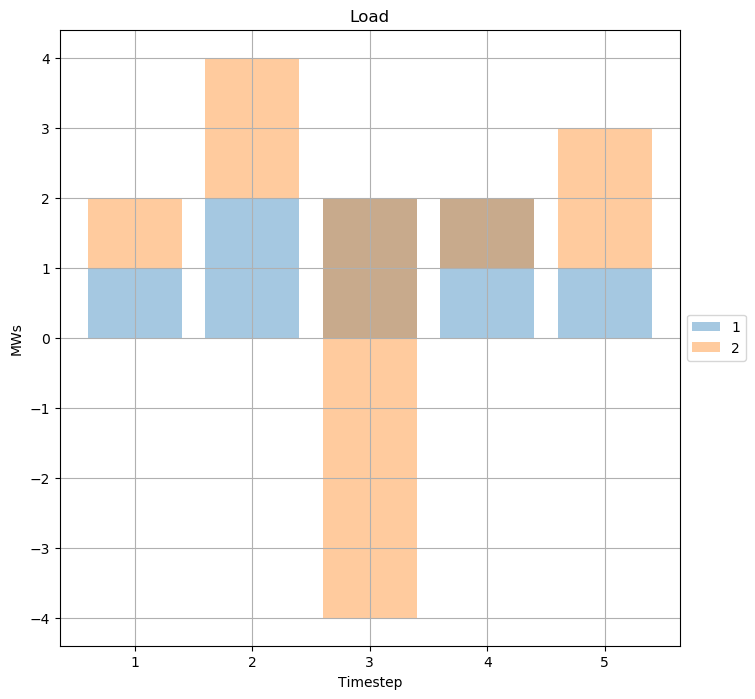

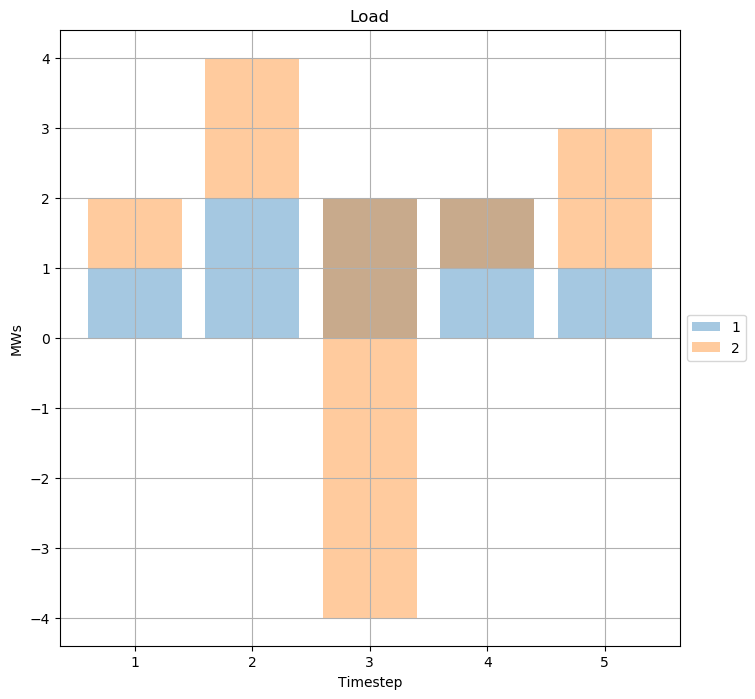

In [7]:
# function plotDemand(data, name, graphTitle, baseMVA=1,timesteps=length(collect(keys(data[:nw]))))
#     ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia
#     t_start = minimum(collect(keys(data[:nw])))
#     loads = length(collect(keys(data[:nw][t_start][:load])))
#     x = zeros(loads, timesteps)
#     y = zeros(loads, timesteps)

#     for i in sort(collect(keys(data[:nw][t_start][:load])))
#         for t in sort(collect(keys(data[:nw])))
#             if t<=timesteps
#                 x[i,t] = t
#                 y[i,t] = data[:nw][t][:load][i]["pd"]*baseMVA
#             end
#         end
#     end

using PyCall, PyPlot
    x = [1 2 3 4 5;
         1 2 3 4 5]
    y = [1 2 2 2 1;
         1 2 -6 -1 2]

    ################
    ##  Bar Plot  ##
    ################
    fig = figure(figsize=(8,8))
    b = bar(x[1,:],y[1,:], align="center",alpha=0.4)
    for i = 2:2
        b = bar(x[i,:],y[i,:], bottom=sum(y[k,:] for k=1:i-1), align="center",alpha=0.4)
    end
    axis("tight")
    title("Load")
    grid("True")
    xlabel("Timestep")
    ylabel("MWs")
    legend(1:2, loc="center left", bbox_to_anchor=(1, 0.5))
    gcf() # Needed for IJulia to plot inline
    #savefig(string(name,"_Loads.png"))
    #close("all")
# end

